<a href="https://colab.research.google.com/github/adinathu/Support-Vector-Machine-Approach-for-CT-Scan-Image-Classification-of-COVID-19/blob/main/Project1_SVM%2BGLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! unzip /content/dataset/ct/CT_NonCOVID.zip

Archive:  /content/dataset/ct/CT_NonCOVID.zip
  inflating: CT_NonCOVID/0.jpg       
  inflating: CT_NonCOVID/1%0.jpg     
  inflating: CT_NonCOVID/1%1.jpg     
  inflating: CT_NonCOVID/1%2.jpg     
  inflating: CT_NonCOVID/10%0.jpg    
  inflating: CT_NonCOVID/10%1.jpg    
  inflating: CT_NonCOVID/10%2.jpg    
  inflating: CT_NonCOVID/102.png     
  inflating: CT_NonCOVID/1029.png    
  inflating: CT_NonCOVID/103.png     
  inflating: CT_NonCOVID/1030.png    
  inflating: CT_NonCOVID/104.png     
  inflating: CT_NonCOVID/1046.png    
  inflating: CT_NonCOVID/1047.png    
  inflating: CT_NonCOVID/1048.png    
  inflating: CT_NonCOVID/1049.png    
  inflating: CT_NonCOVID/1050.png    
  inflating: CT_NonCOVID/1058.png    
  inflating: CT_NonCOVID/1059.png    
  inflating: CT_NonCOVID/1060.png    
  inflating: CT_NonCOVID/1061.png    
  inflating: CT_NonCOVID/1062.png    
  inflating: CT_NonCOVID/1065.png    
  inflating: CT_NonCOVID/1070.png    
  inflating: CT_NonCOVID/1071.png    
  in

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! unzip /content/dataset/ct/CT_COVID.zip

Archive:  /content/dataset/ct/CT_COVID.zip
   creating: CT_COVID/
  inflating: CT_COVID/2020.03.01.20029769-p21-73_1%1.png  
   creating: __MACOSX/
   creating: __MACOSX/CT_COVID/
  inflating: __MACOSX/CT_COVID/._2020.03.01.20029769-p21-73_1%1.png  
  inflating: CT_COVID/Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: __MACOSX/CT_COVID/._Recurrence-of-positive-SARS-CoV-2-RNA-in-C_2020_International-Journal-of-Inf-p1-21%1.png  
  inflating: CT_COVID/2020.03.12.20034686-p17-91-4.png  
  inflating: __MACOSX/CT_COVID/._2020.03.12.20034686-p17-91-4.png  
  inflating: CT_COVID/2020.02.25.20021568-p24-111%8.png  
  inflating: __MACOSX/CT_COVID/._2020.02.25.20021568-p24-111%8.png  
  inflating: CT_COVID/2020.03.13.20035212-p23-153.png  
  inflating: __MACOSX/CT_COVID/._2020.03.13.20035212-p23-153.png  
  inflating: CT_COVID/2020.03.21.20040691-p18-6-6.png  
  inflating: __MACOSX/CT_COVID/._2020.03.21.20040691-p18-6-6.png  
  inflating: CT

In [ ]:
import numpy as np 
import cv2 
import os
import re

# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
        

# -------------------- Load Dataset ------------------------
 
dataset_dir = "/content/dataset" #"/content/dataset/ct/COVID"  /content/dataset/ct/NonCOVID

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]
            
            resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
            imgs.append(resize)
            labels.append(normalize_label(os.path.splitext(filename)[0]))
            descs.append(normalize_desc(folder, sub_folder))
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)


[##########] folder : ct/CT_NonCOVID/ ----> file : 14%2.jpg


**2) Keseluruhan dataset citra daun akan tersimpan pada list 'imgs' dan nama daun disimpan pada list 'labels'. Kita dapat preview salah satu citra dengan cara berikut**

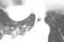

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs[5])

**3) Selanjutnya kita dapat mencari matrix GLCM dan metric texture keseluruhan citra daun dengan menggunakan fungsi greycomatrix() dan greycoprops() pada library Scikit-Image**

In [ ]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("label")

**4) Selanjutnya kita ubah format data glcm_features dari list menjadi Dataframe menggunakan library pandas**

In [ ]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

glcm_df.head(1500)

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,35.363084,35.121951,27.241694,34.658537,0.629171,0.630498,0.748364,0.644203,0.089509,0.090251,...,2990.729140,0.000468,0.000545,0.000590,0.000460,0.021635,0.023342,0.024289,0.021457,1561
1,22.251589,22.198208,19.408402,23.378136,0.711432,0.720104,0.793971,0.713943,0.156373,0.154565,...,1829.002509,0.002278,0.002205,0.002183,0.002114,0.047728,0.046954,0.046725,0.045977,60
2,30.755144,33.434894,28.896302,31.536585,0.689965,0.643207,0.717048,0.675034,0.136350,0.131690,...,2889.710071,0.002231,0.001875,0.001843,0.001730,0.047238,0.043299,0.042927,0.041592,1858
3,19.641564,19.630226,20.150740,20.855183,0.547789,0.549069,0.538763,0.471496,0.125596,0.133335,...,1300.545078,0.001335,0.001440,0.001394,0.001337,0.036533,0.037951,0.037332,0.036566,1702
4,40.175485,44.539634,38.365253,41.814962,0.685186,0.638658,0.715027,0.692344,0.486762,0.464310,...,5843.905488,0.184307,0.164468,0.196064,0.176113,0.429310,0.405546,0.442791,0.419658,1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,25.246881,26.498571,26.702851,29.189251,0.571927,0.540876,0.545338,0.455669,0.142002,0.142031,...,2858.888508,0.002475,0.002387,0.002242,0.002310,0.049748,0.048856,0.047345,0.048061,2020.03.12.20027185-p8-217
742,33.181667,37.966346,30.974510,30.868674,0.712032,0.664889,0.760378,0.735976,0.096241,0.084112,...,2979.396508,0.000644,0.000551,0.000587,0.000612,0.025380,0.023482,0.024234,0.024738,2020.03.08.20031658-p15-105
743,38.569714,49.708925,47.011730,43.180527,0.505448,0.247785,0.321142,0.388603,0.063853,0.063634,...,5131.089249,0.000635,0.000606,0.000592,0.000637,0.025194,0.024611,0.024325,0.025246,2020.03.04.20031047-p12-81%1
744,30.697681,32.896961,29.740371,30.866413,0.789233,0.769717,0.804188,0.782817,0.158227,0.144028,...,3214.301361,0.004534,0.003695,0.003968,0.003889,0.067333,0.060789,0.062992,0.062365,Talaromyces-marneffei-infection-relapse-presen...


In [ ]:
glcm_df.shape

(746, 25)

In [ ]:
glcm_df.to_excel("output2.xlsx")  


## **SVM**

In [ ]:
data1=pd.read_csv("/content/output2.csv")

In [ ]:
x=data1.iloc[:,1:25]
x

In [ ]:
x.shape

In [ ]:
x.info()

In [ ]:
x.describe()

In [ ]:
y=data1.label 
y

In [ ]:
import matplotlib.pyplot as plt
color_list = ['red' if i=='Covid' else 'blue' if i=='noncovid' else 'green' for i in data1.loc[:,'label']]
pd.plotting.scatter_matrix(x.loc[:, x.columns != 'label'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:

from sklearn import svm
svmc = svm.SVC()
svmc.fit(x_train, y_train)
y_pred=svmc.predict(x_test)

In [ ]:
print('Accuracy= ',metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)
sn.heatmap(cm, annot=True)